In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X_train = pd.read_csv(r"../data/X_train.csv")
X_test = pd.read_csv(r"../data/X_test.csv")
y_train = pd.read_csv(r"../data/y_train.csv")
y_test = pd.read_csv(r"../data/y_test.csv")

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((59954, 92), (59954, 1), (14989, 92), (14989, 1))

c:\Users\aman2\OneDrive\Desktop\Git repo\CADCS---Charging-Time-Prediction-for-Battery-Electric-Vehicles-BEVs-using-Time-Series-Methods\.venv\Lib\site-packages\tcn\tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)



Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - loss: 0.0322 - val_loss: 0.0042
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.0035 - val_loss: 0.0039
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 0.0024 - val_loss: 0.0028
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 8/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.0010 - val_loss: 0.0024
Epoch 9/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.0010 - val_loss: 0.0019
Epoch 10/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 8.0726e-04 - val_loss: 0.0018
Epoch 11/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 8.5130e-04 - val_loss: 0.0021
Epoch 12/30
422/422 ━━━━━━━━━━━

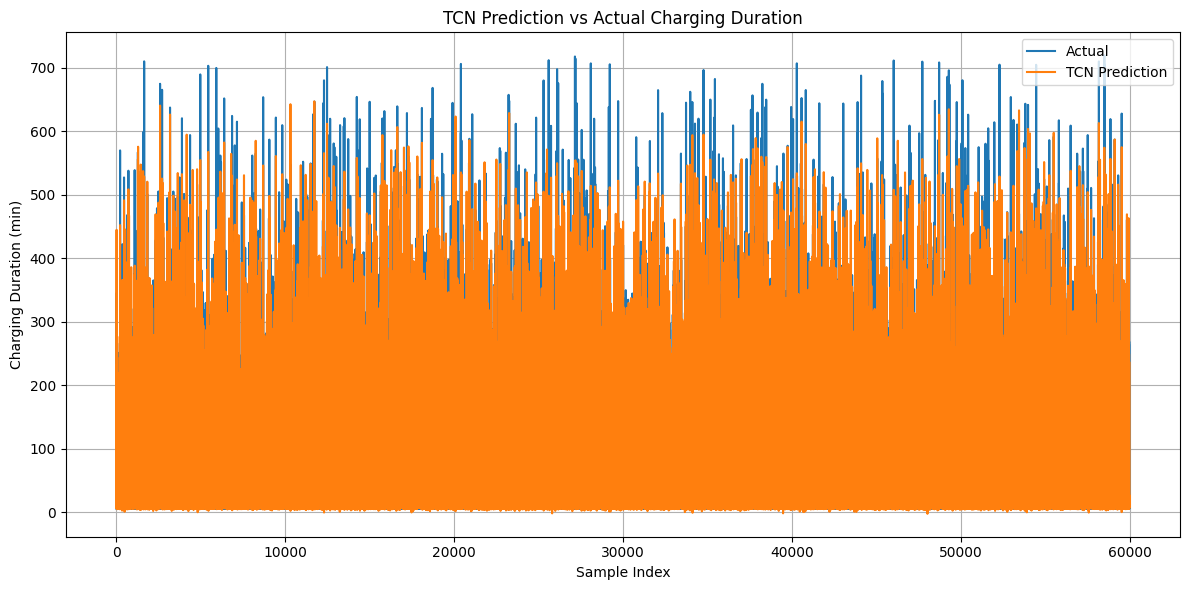

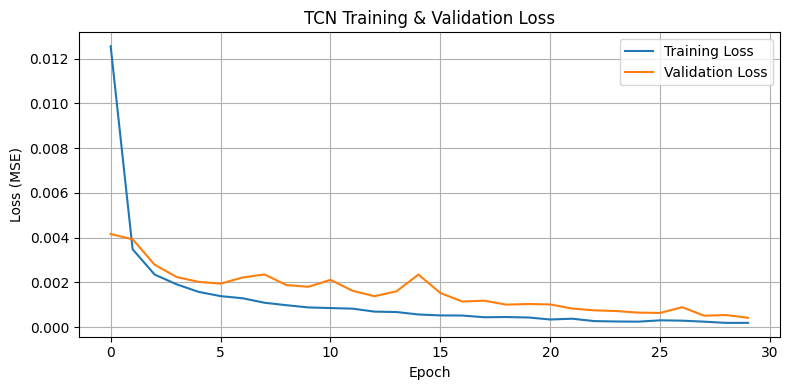

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tcn import TCN  # Install with `pip install keras-tcn`

# === Load data ===
X_test = pd.read_csv(r"../data/X_train.csv")
X_train = pd.read_csv(r"../data/X_test.csv")
y_test = pd.read_csv(r"../data/y_train.csv")
y_train = pd.read_csv(r"../data/y_test.csv")

# === Scale features ===
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# === Reshape for TCN (samples, timesteps, features) ===
X_train_tcn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_tcn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# === Build TCN model ===
model_tcn = Sequential()
model_tcn.add(TCN(input_shape=(X_train_tcn.shape[1], X_train_tcn.shape[2])))
model_tcn.add(Dense(1))
model_tcn.compile(optimizer='adam', loss='mse')

# === Train model ===
history_tcn = model_tcn.fit(X_train_tcn, y_train_scaled, epochs=30, batch_size=32, validation_split=0.1, verbose=1)

# === Predict and inverse scale ===
y_pred_tcn_scaled = model_tcn.predict(X_test_tcn)
y_pred_tcn = scaler_y.inverse_transform(y_pred_tcn_scaled)
y_test_inv = scaler_y.inverse_transform(y_test_scaled)

# === Evaluate ===
mse_tcn = mean_squared_error(y_test_inv, y_pred_tcn)
mae_tcn = mean_absolute_error(y_test_inv, y_pred_tcn)
r2_tcn = r2_score(y_test_inv, y_pred_tcn)

print("\n--- TCN Model Performance ---")
print(f"MSE: {mse_tcn:.2f}")
print(f"MAE: {mae_tcn:.2f}")
print(f"R² Score: {r2_tcn:.2f}")

# === Plot Actual vs Predicted ===
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_tcn, label='TCN Prediction')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Charging Duration (min)')
plt.title('TCN Prediction vs Actual Charging Duration')
plt.grid(True)
plt.tight_layout()
plt.show()

# === Plot Training Loss ===
plt.figure(figsize=(8,4))
plt.plot(history_tcn.history['loss'], label='Training Loss')
plt.plot(history_tcn.history['val_loss'], label='Validation Loss')
plt.title("TCN Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


c:\Users\aman2\OneDrive\Desktop\Git repo\CADCS---Charging-Time-Prediction-for-Battery-Electric-Vehicles-BEVs-using-Time-Series-Methods\.venv\Lib\site-packages\tcn\tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


Epoch 1/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 317s 183ms/step - loss: 0.0282 - val_loss: 0.0021
Epoch 2/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 284s 168ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 3/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 164s 97ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 4/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 102s 38ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 5/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 64s 38ms/step - loss: 9.3119e-04 - val_loss: 6.6098e-04
Epoch 6/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 61s 36ms/step - loss: 6.0601e-04 - val_loss: 3.9587e-04
Epoch 7/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - loss: 3.4993e-04 - val_loss: 6.9701e-04
Epoch 8/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 63s 37ms/step - loss: 2.8207e-04 - val_loss: 2.1549e-04
Epoch 9/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 64s 38ms/step - loss: 2.1638e-04 - val_loss: 1.6285e-04
Epoch 10/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 66s 39ms/step - loss: 1.6717e-04 - val_loss: 2.5702e-04
Epoch 11/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 24

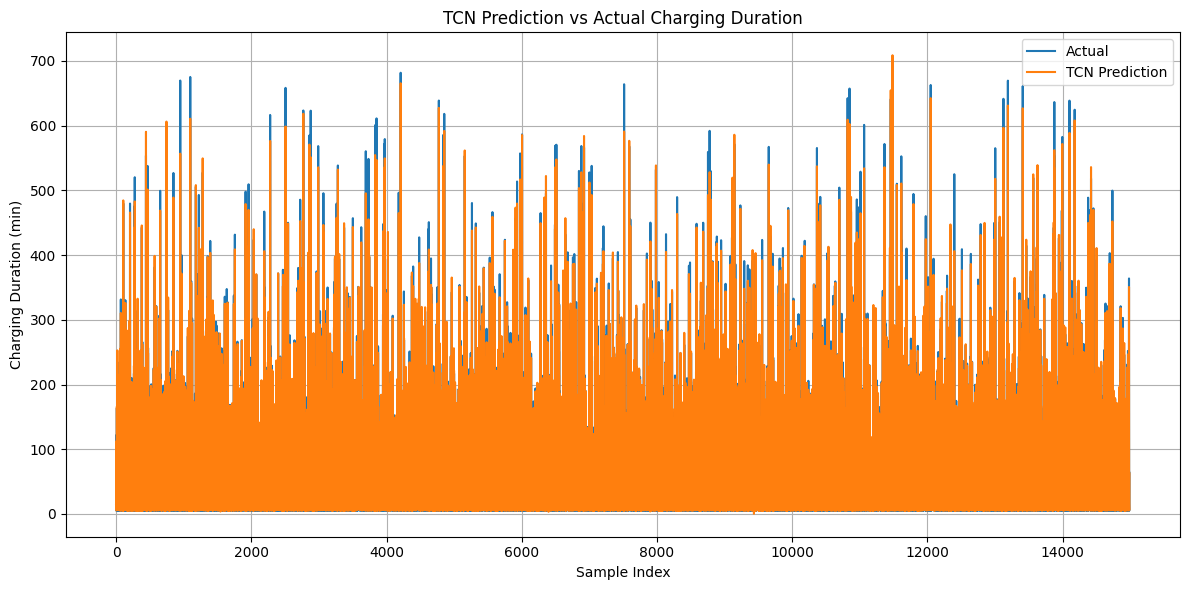

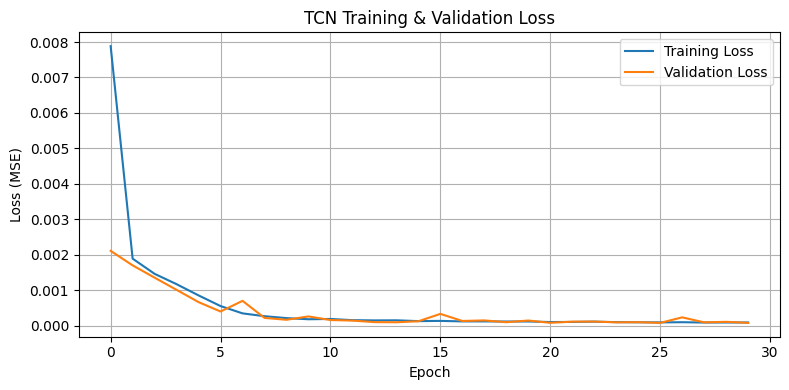

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tcn import TCN  # Install with `pip install keras-tcn`

# === Load data ===
X_train= pd.read_csv(r"../data/X_train.csv")
X_test = pd.read_csv(r"../data/X_test.csv")
y_train = pd.read_csv(r"../data/y_train.csv")
y_test = pd.read_csv(r"../data/y_test.csv")

# === Scale features ===
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# === Reshape for TCN (samples, timesteps, features) ===
X_train_tcn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_tcn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# === Build TCN model ===
model_tcn = Sequential()
model_tcn.add(TCN(input_shape=(X_train_tcn.shape[1], X_train_tcn.shape[2])))
model_tcn.add(Dense(1))
model_tcn.compile(optimizer='adam', loss='mse')

# === Train model ===
history_tcn = model_tcn.fit(X_train_tcn, y_train_scaled, epochs=30, batch_size=32, validation_split=0.1, verbose=1)

# === Predict and inverse scale ===
y_pred_tcn_scaled = model_tcn.predict(X_test_tcn)
y_pred_tcn = scaler_y.inverse_transform(y_pred_tcn_scaled)
y_test_inv = scaler_y.inverse_transform(y_test_scaled)

# === Evaluate ===
mse_tcn = mean_squared_error(y_test_inv, y_pred_tcn)
mae_tcn = mean_absolute_error(y_test_inv, y_pred_tcn)
r2_tcn = r2_score(y_test_inv, y_pred_tcn)

print("\n--- TCN Model Performance ---")
print(f"MSE: {mse_tcn:.2f}")
print(f"MAE: {mae_tcn:.2f}")
print(f"R² Score: {r2_tcn:.2f}")

# === Plot Actual vs Predicted ===
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_tcn, label='TCN Prediction')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Charging Duration (min)')
plt.title('TCN Prediction vs Actual Charging Duration')
plt.grid(True)
plt.tight_layout()
plt.show()

# === Plot Training Loss ===
plt.figure(figsize=(8,4))
plt.plot(history_tcn.history['loss'], label='Training Loss')
plt.plot(history_tcn.history['val_loss'], label='Validation Loss')
plt.title("TCN Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
